## Installing and Loading Libraries

In [26]:
import folium

In [27]:
import numpy as np
import pandas as pd
import sklearn
import xgboost as xgb

In [31]:
df_data_13 = pd.read_csv('/project_data/data_asset/madrid_houses_2.csv', sep=";", parse_dates=['create_date'], infer_datetime_format=True )
df_data_13.head()

ad_id     price  region_level2_id      lat      lng  \
0  141537319.0  550000.0              28.0  40.4040 -3.69258   
1  141129777.0   84999.0              28.0  40.4212 -3.61754   
2  141321296.0  159999.0              28.0  40.4226 -3.64750   
3  142917234.0  515000.0              28.0  40.4429 -3.71124   
4  141506865.0  115000.0              28.0  40.3796 -3.73910   

          create_date property property_state  district_id   mts2  ...  \
0 2017-02-22 13:15:54     Flat       VeryGood        671.0  178.0  ...   
1 2017-01-17 19:37:03     Flat            NaN        676.0   60.0  ...   
2 2017-02-02 18:53:29     Flat            NaN        685.0   67.0  ...   
3 2017-06-15 07:43:11     Flat           Good        177.0  139.0  ...   
4 2017-02-20 13:00:42     Flat            NaN        171.0   56.0  ...   

   pista-tenis sauna  piscina-comunitaria  puerta-blindada  terraza lavadora  \
0            0     0                    0                0        1        0   
1            0     0                    0                0        0        0   
2            0     0                    0                0        0        0   
3            0     0                    0                0        0        0   
4            0     0                    0                1        0        0   

   serv-porteria  zona-infantil  cocina-office parking-comunitario  
0              1              0              0                   0  
1              0              0              0                   0  
2              0              0              0                   0  
3              0              0              0                   0  
4              0              0              0                   0  

[5 rows x 92 columns]

In [32]:
madrid_data = df_data_13

In [33]:
madrid_with_price = madrid_data[ (madrid_data["price"] > 30.000) & (madrid_data["mts2"] > 30.0) ]
madrid_with_price.head()

ad_id     price  region_level2_id      lat      lng  \
0  141537319.0  550000.0              28.0  40.4040 -3.69258   
1  141129777.0   84999.0              28.0  40.4212 -3.61754   
2  141321296.0  159999.0              28.0  40.4226 -3.64750   
3  142917234.0  515000.0              28.0  40.4429 -3.71124   
4  141506865.0  115000.0              28.0  40.3796 -3.73910   

          create_date property property_state  district_id   mts2  ...  \
0 2017-02-22 13:15:54     Flat       VeryGood        671.0  178.0  ...   
1 2017-01-17 19:37:03     Flat            NaN        676.0   60.0  ...   
2 2017-02-02 18:53:29     Flat            NaN        685.0   67.0  ...   
3 2017-06-15 07:43:11     Flat           Good        177.0  139.0  ...   
4 2017-02-20 13:00:42     Flat            NaN        171.0   56.0  ...   

   pista-tenis sauna  piscina-comunitaria  puerta-blindada  terraza lavadora  \
0            0     0                    0                0        1        0   
1            0     0                    0                0        0        0   
2            0     0                    0                0        0        0   
3            0     0                    0                0        0        0   
4            0     0                    0                1        0        0   

   serv-porteria  zona-infantil  cocina-office parking-comunitario  
0              1              0              0                   0  
1              0              0              0                   0  
2              0              0              0                   0  
3              0              0              0                   0  
4              0              0              0                   0  

[5 rows x 92 columns]

In [34]:
print("A total of ", madrid_with_price.count()[0], " houses are available in the data set.")


A total of  16163  houses are available in the data set.


## Heatmap of Data with Folium

In [35]:
import folium

cybele_palace = (40.418906, -3.692084)

lat_lng_list = list( zip( list(madrid_with_price.lat), list(madrid_with_price.lng) ) )
house_density = [ (lat,lng,0.3) for (lat,lng) in lat_lng_list ]
centre_madrid = cybele_palace

from folium.plugins import HeatMap

map_with_houses = folium.Map(centre_madrid, tiles='stamentoner', zoom_start=11)

HeatMap(house_density).add_to(map_with_houses)
map_with_houses

## A Classic Linear Regression on the size of property to predict the price

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [36]:
import numpy as np
from sklearn import datasets, linear_model

x = madrid_with_price["mts2"].to_frame()
y = madrid_with_price["price"].to_frame()

In [37]:
%matplotlib inline  
import matplotlib.pyplot as plt

regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.figure(figsize=(17, 9))
title = "Linear Regression shows, each square-m is worth {0:.2f} euro".format( regr.coef_.flatten()[0] )
plt.title(title, fontsize=28) 
plt.scatter(x.values, y.values,  color='black')
plt.xticks((np.arange(100,2000,100)))
plt.yticks((np.arange(20000,10000000,1000000)))
plt.xlabel('Area', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.plot(x, regr.predict(x), color='blue', linewidth=3)

plt.show()

In [38]:
y_true = madrid_with_price["price"].to_frame()
y_pred = regr.predict(madrid_with_price["mts2"].to_frame())

In [39]:
regression_MSE = sklearn.metrics.mean_squared_error(y_true, y_pred)
rmse_lm = np.sqrt(regression_MSE)

In [40]:
rmse_lm

374300.4377513558

## Feature Engineering - Add `distance_to_centre` as new Column

In [41]:
import geopy
from geopy.distance import great_circle

puerta_del_sol = (40.416920, -3.703479)

def distance_to_puerta_del_sol(lat, lng):
    global puerta_del_sol
    return great_circle( (lat,lng), puerta_del_sol ).km

cybele_palace = (40.418906, -3.692084)
print( "The distance (KM) from Cybele Palace, to Puerta del Sol is {0:.2f} KM".format( distance_to_puerta_del_sol(*cybele_palace) ) )

The distance (KM) from Cybele Palace, to Puerta del Sol is 0.99 KM


In [42]:
distance_to_centre_series = madrid_with_price.apply( lambda x : distance_to_puerta_del_sol(x.lat , x.lng) , axis=1)
distance_to_centre_df = distance_to_centre_series.to_frame(name="distance_to_centre")
distance_to_centre_df.head(5)

distance_to_centre
0            1.707470
1            7.290744
2            4.780775
3            2.962595
4            5.130278

In [43]:
madrid_with_centre = madrid_with_price.join(distance_to_centre_df)
madrid_with_centre[["ad_id","price","lat","lng","create_date","distance_to_centre","mts2"]].head(5)

ad_id     price      lat      lng         create_date  \
0  141537319.0  550000.0  40.4040 -3.69258 2017-02-22 13:15:54   
1  141129777.0   84999.0  40.4212 -3.61754 2017-01-17 19:37:03   
2  141321296.0  159999.0  40.4226 -3.64750 2017-02-02 18:53:29   
3  142917234.0  515000.0  40.4429 -3.71124 2017-06-15 07:43:11   
4  141506865.0  115000.0  40.3796 -3.73910 2017-02-20 13:00:42   

   distance_to_centre   mts2  
0            1.707470  178.0  
1            7.290744   60.0  
2            4.780775   67.0  
3            2.962595  139.0  
4            5.130278   56.0

## Feature Engineering - Lat / Long, & Metro Stations in Madrid

We can add more features, like the distance to the closest metro station

![](https://s-media-cache-ak0.pinimg.com/originals/eb/8d/e5/eb8de521b72848827903a35a2e9ceca9.jpg)

In [48]:
df_data_14 = pd.read_csv('/project_data/data_asset/unique_metro_2.csv', sep=";")
df_data_14.head()


0             Pacífico (Madrid Metro)   40.40126  -3.6751312000000005
0  1  Sierra de Guadalupe (Madrid Metro)  40.382164            -3.624719
1  2               Atocha (Madrid Metro)  40.408851            -3.692484
2  3             Portazgo (Madrid Metro)  40.392661            -3.658679
3  4               Bilbao (Madrid Metro)  40.429054            -3.702182
4  5         Antón Martín (Madrid Metro)  40.412468            -3.699369

In [50]:
metros_in_madrid = df_data_14
metros_in_madrid.columns = ["id","station","latitude","longitude"]
metros_in_madrid = metros_in_madrid[ metros_in_madrid["latitude"] > 39.5 ]
metros_in_madrid.head()

id                             station   latitude  longitude
0   1  Sierra de Guadalupe (Madrid Metro)  40.382164  -3.624719
1   2               Atocha (Madrid Metro)  40.408851  -3.692484
2   3             Portazgo (Madrid Metro)  40.392661  -3.658679
3   4               Bilbao (Madrid Metro)  40.429054  -3.702182
4   5         Antón Martín (Madrid Metro)  40.412468  -3.699369

### Again, we can use Folium to make pretty maps of the Metro Stations in Madrid

In [51]:
import folium

map_osm = folium.Map(location=[np.mean(metros_in_madrid.latitude), np.mean(metros_in_madrid.longitude)])
for i in range(metros_in_madrid.id.count()):
    row = metros_in_madrid.iloc[i]
    folium.Marker([row.latitude, row.longitude]).add_to(map_osm)
    
map_osm

Zoom in to take a look at where the metros are.

### Determine distance from our favourite reference location to the nearest metro station
We do this by defining a function which uses the locations of all the metros, the call the functions with our favourite Cybele Palace location 

In [52]:
import geopy

from geopy.distance import great_circle

metro_location_tuples = list(zip( metros_in_madrid.latitude.values, metros_in_madrid.longitude.values ))

def distance_to_nearest_metro(lat, lng):
    global metro_location_tuples
    distance =  great_circle( (lat,lng), metro_location_tuples[0] ).km
    distances =  map(lambda ll: great_circle( (lat,lng), (ll[0],ll[1]) ).km , metro_location_tuples)
    return min(distances)

cybele_palace = (40.418906, -3.692084)

print( "The distance (KM) from Cybele Palace, to the nearest metro is {0:.2f} KM".format( distance_to_nearest_metro(*cybele_palace) ) )

The distance (KM) from Cybele Palace, to the nearest metro is 0.24 KM


### Calculating the Distance from all houses, to each metro station can take 1 minute or so.

In [53]:
distance_series = madrid_with_price.apply( lambda x : distance_to_nearest_metro(x.lat , x.lng) , axis=1)
distance_df = distance_series.to_frame(name="distance_to_metro")

### Feature Engineering - Make Data more colorful, reflect certain aspect more prominent in the data
If we join the results of the distance calculation with the original data we can show the distance to a metro station

In [54]:
madrid_with_metro = madrid_with_centre.join( distance_df )
madrid_with_metro.head(3)

ad_id     price  region_level2_id      lat      lng  \
0  141537319.0  550000.0              28.0  40.4040 -3.69258   
1  141129777.0   84999.0              28.0  40.4212 -3.61754   
2  141321296.0  159999.0              28.0  40.4226 -3.64750   

          create_date property property_state  district_id   mts2  ...  \
0 2017-02-22 13:15:54     Flat       VeryGood        671.0  178.0  ...   
1 2017-01-17 19:37:03     Flat            NaN        676.0   60.0  ...   
2 2017-02-02 18:53:29     Flat            NaN        685.0   67.0  ...   

   piscina-comunitaria puerta-blindada  terraza  lavadora  serv-porteria  \
0                    0               0        1         0              1   
1                    0               0        0         0              0   
2                    0               0        0         0              0   

  zona-infantil  cocina-office  parking-comunitario  distance_to_centre  \
0             0              0                    0            1.707470   
1             0              0                    0            7.290744   
2             0              0                    0            4.780775   

  distance_to_metro  
0          0.169548  
1          0.482161  
2          0.514768  

[3 rows x 94 columns]

### That worked, but added the distance to metro as column 92 !
Lets specify the columns we want to see !

In [55]:
madrid_with_metro[["ad_id","price","lat","lng","create_date","distance_to_centre","distance_to_metro","mts2"]].head(5) 

ad_id     price      lat      lng         create_date  \
0  141537319.0  550000.0  40.4040 -3.69258 2017-02-22 13:15:54   
1  141129777.0   84999.0  40.4212 -3.61754 2017-01-17 19:37:03   
2  141321296.0  159999.0  40.4226 -3.64750 2017-02-02 18:53:29   
3  142917234.0  515000.0  40.4429 -3.71124 2017-06-15 07:43:11   
4  141506865.0  115000.0  40.3796 -3.73910 2017-02-20 13:00:42   

   distance_to_centre  distance_to_metro   mts2  
0            1.707470           0.169548  178.0  
1            7.290744           0.482161   60.0  
2            4.780775           0.514768   67.0  
3            2.962595           0.395086  139.0  
4            5.130278           0.589277   56.0

## Convert Categories with Factorization/One-Hot-Encode

In [56]:
COLUMNS_TO_ENCODE = ["property_state", "district"]

In [57]:
madrid_with_metro_encoded = madrid_with_metro.copy()

In [58]:
label_mapping = {}

for column in COLUMNS_TO_ENCODE:
    madrid_with_metro_encoded[column], label_mapping[column] = pd.factorize(madrid_with_metro[column])

In [60]:
label_mapping

{'property_state': Index(['VeryGood', 'Good', 'AlmostNew', 'ToMakeImprovements', 'Reformed'], dtype='object'),
 'district': Index(['Arganzuela', 'San Blas', 'Ciudad Lineal', 'Chamberí', 'Carabanchel',
        'Chamartín', 'Usera', 'Centro', 'Moncloa', 'Barajas',
        'Puente de Vallecas', 'Fuencarral', 'Tetuán', 'Moratalaz', 'Latina',
        'Retiro', 'Salamanca', 'Villa de Vallecas', 'Hortaleza', 'Villaverde',
        'Vicálvaro'],
       dtype='object')}

In [61]:
%matplotlib inline

_ = madrid_with_metro_encoded.price.hist(bins=50,)

In [62]:
madrid_with_metro_encoded['log_price'] = np.log( madrid_with_metro_encoded.price )

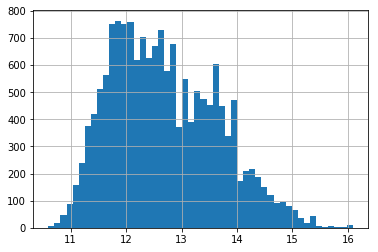

In [63]:
%matplotlib inline

_ = madrid_with_metro_encoded.log_price.hist(bins=50,)

In [64]:
from sklearn.model_selection import train_test_split, KFold

FEATURE_COLUMNS = ["property_state", "distance_to_centre", "distance_to_metro", "mts2"]

x_train, x_test, y_train, y_test = train_test_split(madrid_with_metro_encoded[FEATURE_COLUMNS], madrid_with_metro_encoded["log_price"])

## XGBoost Training

https://xgboost.readthedocs.io/en/latest/parameter.html

In [102]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

params = {
    'objective' : 'reg:linear',
    'tree_method':'auto',
    'min_child_weight' : 1,
    'eta' : 0.25,
    'gamma': 0,
    'max_depth': 6,
    'silent': 1,
    'nthread' : 1,
    'colsample_bytree': 0.7,
    'subsample':0.8,
}

hist = xgb.cv(params, dtrain, nfold=3, as_pandas=True, num_boost_round=30, verbose_eval=5, early_stopping_rounds=50)

[0]	train-rmse:9.19239+0.00120799	test-rmse:9.19161+0.00225695
[5]	train-rmse:2.23665+0.0110268	test-rmse:2.23454+0.00876471
[10]	train-rmse:0.619969+0.00274467	test-rmse:0.622016+0.00496121
[15]	train-rmse:0.316368+0.000362778	test-rmse:0.324686+0.00365455
[20]	train-rmse:0.273666+0.0014333	test-rmse:0.285897+0.00401717
[25]	train-rmse:0.260146+0.00202254	test-rmse:0.274947+0.00516525
[29]	train-rmse:0.254126+0.00186421	test-rmse:0.27062+0.00445531


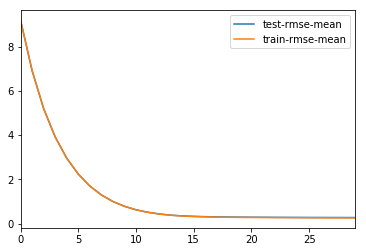

In [103]:
hist.plot(y=["test-rmse-mean", "train-rmse-mean"])

In [104]:
%%time
bst = xgb.train(params, dtrain, num_boost_round=30, verbose_eval=5)

CPU times: user 117 ms, sys: 2.98 ms, total: 120 ms
Wall time: 118 ms


In [105]:
y_preds = bst.predict(dtest)

In [106]:
y_preds_exp = np.exp(y_preds)
y_true_exp = np.exp(y_test)

mse_xgb = sklearn.metrics.mean_squared_error(y_preds_exp, y_true_exp)
rmse_xgb = np.sqrt(mse_xgb)
print(rmse_xgb)

278641.8387582182


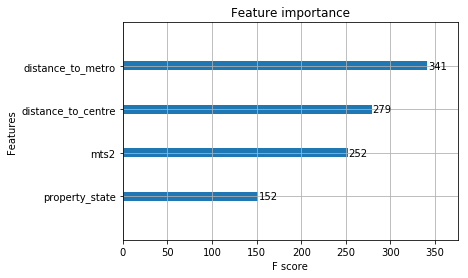

In [107]:
_ = xgb.plot_importance(bst)

In [108]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)
money = [rmse_lm, rmse_xgb]

fig, ax = plt.subplots()

plt.bar(x, money)
plt.xticks(x, ('RMSE Linear Model', 'RMSE XGBoost'))
plt.show()

## Use Watson Machine Learning Service - Store and Deploy the XGBoost Model



In [111]:
# Specify a name for the space being created, the saved models and the model deployments
space_name = 'madrid_demo_space'
model_name = 'madrid_demo_model'
deployment_name = 'madrid_demo_model_deployment'

In [113]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
import os

token = os.environ['USER_ACCESS_TOKEN']

wml_credentials = {
   "token": token,
   "instance_id" : "openshift",
   "url": os.environ['RUNTIME_ENV_APSX_URL'],
   "version": "2.5.0"
}

client = WatsonMachineLearningAPIClient(wml_credentials)

## Deploy

https://www.ibm.com/support/producthub/icpdata/docs/content/SSQNUZ_current/wsj/wmls/wmls-deploy-python.html

### Create the Deployment Spacem
Create a new deployment space. Use the name of the space as specified in the user inputs cell above. A default tag for the space is specified in the space metadata. This tag will be used in the future to identify this space. If a space with specified space_name already exists, a new space with the same name is created. Set this deployment space as the default space.

In [114]:
# create the space and set it as default
space_meta_data = {
        client.spaces.ConfigurationMetaNames.NAME : space_name,
        client.spaces.ConfigurationMetaNames.TAGS : [{'value':'madrid_houses_space_tag'}]
}

stored_space_details = client.spaces.store(space_meta_data)

space_uid = stored_space_details['metadata']['guid']

client.set.default_space(space_uid)

'SUCCESS'

### Store the Model Details
Store the model in the deployment space. Again, the name for the model is specified in the user inputs cell above. A default tag for the model is specified in the model metadata.


https://www.ibm.com/support/producthub/icpdata/docs/content/SSQNUZ_current/wsj/wmls/wmls-deploy-python-types.html


In [125]:
client.runtimes.list(pre_defined=True)

--------------------------  --------------------------  ------------------------  --------
GUID                        NAME                        CREATED                   PLATFORM
do_12.9                     do_12.9                     2020-02-24T16:11:21.727Z  do
pmml_4.3                    pmml_4.3                    2020-02-24T16:11:21.698Z  pmml
pmml_4.2.1                  pmml_4.2.1                  2020-02-24T16:11:21.671Z  pmml
pmml_4.2                    pmml_4.2                    2020-02-24T16:11:21.638Z  pmml
pmml_4.1                    pmml_4.1                    2020-02-24T16:11:21.608Z  pmml
pmml_4.0                    pmml_4.0                    2020-02-24T16:11:21.578Z  pmml
pmml_3.2                    pmml_3.2                    2020-02-24T16:11:21.548Z  pmml
pmml_3.1                    pmml_3.1                    2020-02-24T16:11:21.518Z  pmml
pmml_3.0                    pmml_3.0                    2020-02-24T16:11:21.484Z  pmml
ai-function_0.1-py3.6       ai-functi

In [126]:
metadata = {
    client.repository.ModelMetaNames.NAME: model_name,
    client.repository.ModelMetaNames.TYPE: "xgboost_0.82",
    client.repository.ModelMetaNames.RUNTIME_UID: "xgboost_0.82-py3",
    client.repository.ModelMetaNames.TAGS: [{'value' : 'customer_segmentation_model_tag'}],
    client.repository.ModelMetaNames.SPACE_UID: space_uid
}

stored_model_details = client.repository.store_model(model=bst, meta_props=metadata)

### Deploy the Model

Deploy the saved model. The deployment name is specified in the user inputs cell above. Again, a default tag for the deployment is specified in the deployment metadata. Similarly, this tag will be used in the future to identify this deployment.

In [127]:
# deploy the model
meta_props = {
    client.deployments.ConfigurationMetaNames.NAME: deployment_name,
    client.deployments.ConfigurationMetaNames.TAGS : [{'value' : 'madrid_deployment_tag'}],
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

model_uid = stored_model_details["metadata"]["guid"]
client.deployments.create(artifact_uid=model_uid, meta_props=meta_props)



#######################################################################################

Synchronous deployment creation for uid: 'd3466f5a-e338-4996-98b8-a296c851e914' started

#######################################################################################


initializing
ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='63ea3166-3d93-4905-9dd6-813f279c8cd9'
------------------------------------------------------------------------------------------------




{'metadata': {'parent': {'href': ''},
  'guid': '63ea3166-3d93-4905-9dd6-813f279c8cd9',
  'modified_at': '',
  'created_at': '2020-03-24T13:13:59.581Z',
  'href': '/v4/deployments/63ea3166-3d93-4905-9dd6-813f279c8cd9'},
 'entity': {'name': 'madrid_demo_model_deployment',
  'custom': {},
  'online': {},
  'description': '',
  'tags': [{'value': 'madrid_deployment_tag', 'description': ''}],
  'space': {'href': '/v4/spaces/f33f641a-bc28-40f9-8f6b-e7006ac03672'},
  'status': {'state': 'ready',
   'online_url': {'url': 'https://internal-nginx-svc:12443/v4/deployments/63ea3166-3d93-4905-9dd6-813f279c8cd9/predictions'}},
  'asset': {'href': '/v4/models/d3466f5a-e338-4996-98b8-a296c851e914?space_id=f33f641a-bc28-40f9-8f6b-e7006ac03672'},
  'auto_redeploy': False}}

```{'metadata': {'parent': {'href': ''},
  'guid': '63ea3166-3d93-4905-9dd6-813f279c8cd9',
  'modified_at': '',
  'created_at': '2020-03-24T13:13:59.581Z',
  'href': '/v4/deployments/63ea3166-3d93-4905-9dd6-813f279c8cd9'},
 'entity': {'name': 'madrid_demo_model_deployment',
  'custom': {},
  'online': {},
  'description': '',
  'tags': [{'value': 'madrid_deployment_tag', 'description': ''}],
  'space': {'href': '/v4/spaces/f33f641a-bc28-40f9-8f6b-e7006ac03672'},
  'status': {'state': 'ready',
   'online_url': {'url': 'https://internal-nginx-svc:12443/v4/deployments/63ea3166-3d93-4905-9dd6-813f279c8cd9/predictions'}},
  'asset': {'href': '/v4/models/d3466f5a-e338-4996-98b8-a296c851e914?space_id=f33f641a-bc28-40f9-8f6b-e7006ac03672'},
  'auto_redeploy': False}}
```

In [ ]:
%%capture install_wml
!pip install watson-machine-learning-client

In [109]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-03-24 13:11:35,071 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 400. {"trace":"aeddafed-8ad9-4c75-a9b5-d8f7bb6391d6","errors":[{"code":"unsupported_runtime_details","message":"Unsupported python runtime scikit-learn_0.20-py3.6 for ModelType: xgboost_0.82. Python2 runtimes and user-defined runtimes for non-custom library models are not supported"}]}
2020-03-24 13:12:33,103 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 400. {"trace":"3df4b9d0-c67b-48a1-a849-9a5c70ef226e","errors":[{"code":"unsupported_runtime_details","message":"Unsupported python runtime scikit-learn_0.20-py3 for ModelType: xgboost_0.82. Python2 runtimes and user-defined runtimes for non-custom library models are not supported"}]}
2020-03-24 13:12:47,616 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 400. {"trace":"5ed24e62-b471-49e5-9b54-47403bc50427","errors":[{"

In [63]:
client = WatsonMachineLearningAPIClient(wml_credentials)

## List current Repository (models)

In [64]:
client.repository.list()

------------------------------------  --------------------------------------  ------------------------  -----------------  -----------------
GUID                                  NAME                                    CREATED                   FRAMEWORK          TYPE
cf37bc96-f3f8-44b6-8399-754a962ff046  tf-mnist-showtest1                      2019-11-14T13:42:46.250Z  tensorflow         definition
3702c4fd-bd9e-4cf5-a620-545d1716939f  tf-mnist-showtest1                      2019-11-14T13:33:50.191Z  tensorflow         definition
e8a46d01-2827-4d91-9015-7e608b8ce0d5  Training Def                            2019-11-14T13:22:52.719Z  tensorflow         definition
b975747d-8952-49e6-b259-d3bc3c36719b  tf-mnist-showtest1                      2019-11-14T09:30:01.114Z  tensorflow         definition
daf26e1f-8d1b-4544-b075-447920c2becf  tf-mnist-showtest1                      2019-11-14T09:29:43.166Z  tensorflow         definition
c3c99651-ebfa-4cb2-8ae6-61ba8073a277  tf-mnist-showtest1     

## Store our Model, make it available for other services, like Web Applications

In [ ]:
model_props = {client.repository.ModelMetaNames.NAME: "Native XGBoost - Madrid Housing Prices"}

In [ ]:
model_details = client.repository.store_model(bst, model_props)

In [ ]:
model_details

In [ ]:
# Extract the uid.
model_uid = client.repository.get_model_uid(model_details)
print(model_uid)

## Create Deployment

In [ ]:
# Create the deployment.
deployment_details = client.deployments.create(model_uid, 'Madrid Housing Prices')

In [ ]:
# List the deployments.
client.deployments.list()

In [ ]:
# Extract endpoint url and display it.
scoring_url = client.deployments.get_scoring_url(deployment_details)
print(scoring_url)

In [ ]:
# Prepare scoring payload.
payload_scoring = {"values": [x_test.iloc[0].tolist()]}
print(payload_scoring)

In [ ]:
# Perform prediction and display the result.
response_scoring = client.deployments.score(scoring_url, payload_scoring)
print(response_scoring)

In [ ]:
predicted_price = np.exp(response_scoring['values'][0][0])

In [ ]:
"The price of the House is predicted to be {} - the true price is {}".format(predicted_price, np.exp(y_test.iloc[0]))